# Customer Churn Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.

**A full ERD can be found [here](https://dbdiagram.io/d/638cdd8abae3ed7c45449eed)**

# Data Description
In this task, few datasets are provided:

1. **`BankChurners.csv`**   - this file contains basic information about each client (10 columns). The columns are:
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account;
    - `Attrition Flag` - Internal event (customer activity) variable - if the client had churned (attrited) or not (existing).
    - `Dependent Count` - Demographic variable - Number of dependents
    - `Card_Category` - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
    - `Months_on_book` - Period of relationship with bank
    - `Months_Inactive_12_mon` - No. of months inactive in the last 12 months
    - `Contacts_Count_12_mon` - No. of Contacts in the last 12 months
    - `Credit_Limit` - Credit Limit on the Credit Card
    - `Avg_Open_To_Buy` - Open to Buy Credit Line (Average of last 12 months)
    - `Avg_Utilization_Ratio` - Average Card Utilization Ratio
2. **`basic_client_info.csv`** - this file contains some basic client info per each client (6 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Customer Age` - Demographic variable - Customer's Age in Years
    - `Gender` - Demographic variable - M=Male, F=Female
    - `Education_Level` - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.`
    - `Marital_Status` - Demographic variable - Married, Single, Divorced, Unknown
    - `Income_Category` - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
3. **`enriched_churn_data.csv`** - this file contains some enriched data about each client (7 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Total_Relationship_Count` - Total no. of products held by the customer
    - `Total_Revolving_Bal` - Total Revolving Balance on the Credit Card
    - `Total_Amt_Chng_Q4_Q1` - Change in Transaction Amount (Q4 over Q1)
    - `Total_Trans_Amt` - Total Transaction Amount (Last 12 months)
    - `Total_Trans_Ct` - Total Transaction Count (Last 12 months)
    - `Total_Ct_Chng_Q4_Q1` - Change in Transaction Count (Q4 over Q1)

# SQL tasks

1. How many clients does the bank have and are above the age of 50?
2. What’s the distribution (in %) between male and female clients?
3. Let’s define a new variable called `age_group`:
    - 10 < x ≤ 30
    - 30 < x ≤ 40
    - 40 < x ≤ 50
    - 50 < x ≤ 60
    - 60 <x ≤ 120
    
    Per each `age_group`, `marital_status` and `income_category`, find out the following values:
    
    a. Churn_rate (in %)
    
    b. Average `Total_Relationship_Count`
    
    c. Minimum value of `Total_Amt_Chng_Q4_Q1`
    
    d. Count of customers
    
    Make sure to order the data by the number of customers in a descending order***
    
4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (`CLIENTNUM`’s) of `Total_Amt_Chng_Q4_Q1`?

6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest `Total_Trans_Amt`, Per each `Marital_Status`. 

The bank will create a dedicated campaign and target these specific clients moving forward. In this step, help the bank find these clients.

In order to start writing and running SQL queries here in Workspace, you have a SQL type cell. New cell can be added by clicking on "Add SQL". Masterschool hosts a Postgres DB with all Capstone project datasets. To connect to MS server you need to choose relevant integration. Choose according to the dataset you explore. 

In [4]:
-- Start writing your SQL query here 

SELECT COUNT(*) FROM basic_client_info
WHERE customer_age > 50;

,count
0,3078


In [5]:
SELECT COUNT(*) AS male_count FROM basic_client_info 
WHERE gender = 'M';

,male_count
0,4769


In [6]:
SELECT COUNT(*) AS female_count FROM basic_client_info
WHERE gender = 'F';

,female_count
0,5358


In [7]:
WITH client_count AS (
    SELECT COUNT(*) as total_clients FROM basic_client_info
)
SELECT gender, 
       CONCAT(COUNT(gender)*100/total_clients, ' %') as percentage 
FROM basic_client_info, client_count
GROUP BY gender, client_count.total_clients


,gender,percentage
0,M,47 %
1,F,52 %


In [9]:
WITH age_group AS (
  SELECT 
    CLIENTNUM,
    CASE 
      WHEN customer_age BETWEEN 10 AND 30 THEN '10 - 30' 
      WHEN customer_age BETWEEN 30 AND 40 THEN '30 - 40' 
      WHEN customer_age BETWEEN 40 AND 50 THEN '40 - 50' 
      WHEN customer_age BETWEEN 50 AND 60 THEN '50 - 60' 
      WHEN customer_age BETWEEN 60 AND 120 THEN '60 - 120' 
      ELSE 'Unknown'
    END AS age_group
  FROM basic_client_info
),
churn_data AS (
  SELECT 
    age_group.CLIENTNUM,
    age_group.age_group,
    basic_client_info.Marital_Status,
    basic_client_info.Income_Category,
    BankChurners.Attrition_Flag
  FROM age_group
  JOIN basic_client_info
    ON age_group.CLIENTNUM = basic_client_info.CLIENTNUM
  JOIN BankChurners
    ON age_group.CLIENTNUM = BankChurners.CLIENTNUM
)
SELECT 
  age_group,
  Marital_Status,
  Income_Category,
  CONCAT(ROUND(100.0 * SUM(CASE WHEN attrition_flag = 'Attrited Customer' THEN 1 ELSE 0 END) / COUNT(*), 2), ' %') AS Churn_Rate
FROM churn_data
GROUP BY age_group, Marital_Status, Income_Category
ORDER BY COUNT(*) DESC;


,age_group,marital_status,income_category,churn_rate
0,40 - 50,Married,Less than $40K,18.64 %
1,40 - 50,Single,Less than $40K,17.77 %
2,50 - 60,Married,Less than $40K,15.45 %
3,50 - 60,Single,Less than $40K,19.07 %
4,40 - 50,Married,$40K - $60K,19.13 %
...,...,...,...,...
111,60 - 120,Unknown,$80K - $120K,0.00 %
112,10 - 30,Single,$120K +,50.00 %
113,10 - 30,Unknown,$80K - $120K,0.00 %
114,10 - 30,Unknown,$60K - $80K,0.00 %


In [10]:
WITH age_group AS (
    SELECT 
        CLIENTNUM, 
        CASE 
           WHEN customer_age BETWEEN 10 AND 30 THEN '10 - 30' 
           WHEN customer_age BETWEEN 30 AND 40 THEN '30 - 40' 
           WHEN customer_age BETWEEN 40 AND 50 THEN '40 - 50' 
           WHEN customer_age BETWEEN 50 AND 60 THEN '50 - 60' 
           WHEN customer_age BETWEEN 60 AND 120 THEN '60 - 120' 
      ELSE 'Unknown'
        END AS age_group
    FROM basic_client_info
)

SELECT 
    age_group,
    marital_status,
    income_category,
    AVG(Total_Relationship_Count) as avg_total_relationship_count
FROM 
    age_group
    JOIN enriched_churn_data ON age_group.CLIENTNUM = enriched_churn_data.CLIENTNUM
    JOIN basic_client_info ON age_group.CLIENTNUM = basic_client_info.CLIENTNUM
GROUP BY 
    age_group,
    marital_status,
    income_category
ORDER BY 
    avg_total_relationship_count DESC;


,age_group,marital_status,income_category,avg_total_relationship_count
0,10 - 30,Divorced,$80K - $120K,6.000000
1,60 - 120,Unknown,$80K - $120K,5.500000
2,10 - 30,Divorced,Unknown,5.000000
3,10 - 30,Single,$80K - $120K,5.000000
4,60 - 120,Single,$120K +,5.000000
...,...,...,...,...
111,10 - 30,Divorced,$120K +,3.000000
112,10 - 30,Unknown,$60K - $80K,3.000000
113,10 - 30,Unknown,Less than $40K,2.666667
114,10 - 30,Divorced,$60K - $80K,2.333333


In [11]:
WITH age_groups AS (
  SELECT 
    CLIENTNUM, 
    CASE 
       WHEN customer_age BETWEEN 10 AND 30 THEN '10 - 30' 
       WHEN customer_age BETWEEN 30 AND 40 THEN '30 - 40' 
       WHEN customer_age BETWEEN 40 AND 50 THEN '40 - 50' 
       WHEN customer_age BETWEEN 50 AND 60 THEN '50 - 60' 
       WHEN customer_age BETWEEN 60 AND 120 THEN '60 - 120' 
      ELSE 'Unknown'
    END as age_group
  FROM basic_client_info
)

SELECT 
  age_groups.age_group,
  basic_client_info.marital_status,
  basic_client_info.income_category,
  MIN(enriched_churn_data.Total_Amt_Chng_Q4_Q1) AS Amt_Chng_Q4_Q1
FROM age_groups
JOIN basic_client_info
ON age_groups.CLIENTNUM = basic_client_info.CLIENTNUM
JOIN enriched_churn_data
ON basic_client_info.CLIENTNUM = enriched_churn_data.CLIENTNUM
GROUP BY age_groups.age_group, basic_client_info.marital_status, basic_client_info.income_category
  

,age_group,marital_status,income_category,amt_chng_q4_q1
0,50 - 60,Divorced,$80K - $120K,0.320
1,40 - 50,Married,$80K - $120K,0.313
2,10 - 30,Single,$120K +,0.558
3,40 - 50,Divorced,$40K - $60K,0.176
4,30 - 40,Unknown,Unknown,0.431
...,...,...,...,...
111,50 - 60,Single,$40K - $60K,0.187
112,50 - 60,Married,Unknown,0.307
113,40 - 50,Single,$60K - $80K,0.000
114,50 - 60,Unknown,Unknown,0.620


In [12]:
WITH age_groups AS (
  SELECT 
    CLIENTNUM,
    CASE 
       WHEN customer_age BETWEEN 10 AND 30 THEN '10 - 30' 
       WHEN customer_age BETWEEN 30 AND 40 THEN '30 - 40' 
       WHEN customer_age BETWEEN 40 AND 50 THEN '40 - 50' 
       WHEN customer_age BETWEEN 50 AND 60 THEN '50 - 60' 
       WHEN customer_age BETWEEN 60 AND 120 THEN '60 - 120' 
      ELSE 'Unknown'
    END AS age_group
  FROM basic_client_info
)

SELECT 
  age_groups.age_group, 
  basic_client_info.marital_status, 
  basic_client_info.income_category, 
  COUNT(basic_client_info.CLIENTNUM) AS count_customers
FROM age_groups
JOIN basic_client_info
  ON age_groups.CLIENTNUM = basic_client_info.CLIENTNUM
GROUP BY 
  age_groups.age_group, 
  basic_client_info.marital_status, 
  basic_client_info.income_category

ORDER BY count_customers  DESC;

,age_group,marital_status,income_category,count_customers
0,40 - 50,Married,Less than $40K,735
1,40 - 50,Single,Less than $40K,557
2,50 - 60,Married,Less than $40K,453
3,50 - 60,Single,Less than $40K,388
4,40 - 50,Married,$40K - $60K,366
...,...,...,...,...
111,60 - 120,Unknown,$80K - $120K,2
112,10 - 30,Single,$120K +,2
113,10 - 30,Unknown,$80K - $120K,1
114,10 - 30,Unknown,$60K - $80K,1


In [32]:
SELECT COUNT(income_category)
FROM basic_client_info
JOIN BankChurners
ON basic_client_info.clientnum = BankChurners.clientnum
WHERE income_category = '$40K - $60K' AND gender = 'M' AND card_category = 'Blue';

,count
0,715


In [34]:
SELECT COUNT(income_category) * 100 / (SELECT COUNT(*)
FROM basic_client_info
JOIN BankChurners
ON basic_client_info.clientnum = BankChurners.clientnum) as percentage
FROM basic_client_info
JOIN BankChurners
ON basic_client_info.clientnum = BankChurners.clientnum
WHERE income_category = '$40K - $60K' AND gender = 'M' AND card_category = 'Blue';

,percentage
0,7


In [35]:
SELECT clientnum
FROM enriched_churn_data
ORDER BY Total_Amt_Chng_Q4_Q1 DESC
LIMIT 4 OFFSET 2;

,clientnum
0,713989233
1,713982108
2,803043933
3,738406533


In [37]:
SELECT bci.clientnum, bci.marital_status, bcd.Total_Trans_Amt
FROM basic_client_info bci
JOIN enriched_churn_data bcd
ON bci.clientnum = bcd.clientnum
ORDER BY bcd.Total_Trans_Amt DESC
LIMIT 1 OFFSET 1;

In [9]:
SELECT * from basic_client_info LIMIT 10

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708104658,46,M,Graduate,Unknown,$40K - $60K
1,708108333,47,F,Graduate,Married,Unknown
2,708112008,56,M,Graduate,Married,$80K - $120K
3,708113208,53,F,High School,Married,Less than $40K
4,708117933,44,F,Graduate,Divorced,Less than $40K
5,708119658,49,F,Graduate,Married,$40K - $60K
6,708121908,48,M,Unknown,Married,$80K - $120K
7,708123033,41,F,Graduate,Single,Less than $40K
8,708125733,46,F,College,Divorced,Less than $40K
9,708128733,50,F,Post-Graduate,Single,Unknown


In [2]:
SELECT * from BankChurners LIMIT 20

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119
5,717296808,Existing Customer,1,Blue,56,3,2,3006.0,489.0,0.837
6,809164083,Existing Customer,1,Blue,56,1,2,2619.0,840.0,0.679
7,787348608,Existing Customer,0,Blue,56,2,3,3252.0,1757.0,0.460
8,778286433,Existing Customer,0,Blue,56,2,1,5876.0,4579.0,0.221
9,822969858,Existing Customer,0,Blue,56,1,3,5585.0,4120.0,0.262


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualizations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Total number of clients
    - Churn rate %
    - Average transaction amount per customer
    - Average transaction amount before churn
    - etc.
2. **Churn rate %** among different **age groups**. You will need to:
    - Use the Bins function to split client age into age ranges
    - Define Churn rate % as a calculated field
    - Choose the way of visualizing the comparison
3. **A Scatterplot** visualizing certain customer spending behaviors and their connection to the churn if exists. For example, you can compare Total transaction amount and Total transaction count of each client and use color to mark churned and existing customers. 
4. **A Highlight Table** comparing Churn rate % among two demographic dimensions (from *basic_client_info* table), where one is placed on Rows and another on Columns, forming a matrix. 
5. **A Bar Chart** with multiple metrics by Clientnum, where each row represents one Client and has multiple metrics as columns. Add a few filters or parameters to let user drill down into the set of clients they are interested in.
6. **A Pareto Analysis** based on custom defined **customer segment**. 
    - Segment can include values from the demographic information of the client. For example,
        - Gender | Income
        - Gender | Income | Marital status
        - etc.
    - Choose the metric to analyse. For example,
        - Total number of clients (People from which customer segments most often become our clients?)
        - Churn rate absolute (How many churned customers we have in each segment?)
        - Churn rate % (What is the relative churn rate in each customer segment?)
        - etc.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the metric used in the chart(s)
    - to change the value of a benchmark
8. At least one **more visualization of your choice** adds value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._

_For_ deep dive analysis and EDA follow the guidelines on project [page](https://cms.master.school/final-project-jan23)

# Deep Dive Analysis

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading + let's see the head of each file we have
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')


### Summary Statistics short analysis

In [3]:
bank_churners_df.head(3)

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077


In [3]:
basic_client_info_df.head(3)

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [4]:
enriched_churn_df.head(3)

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


In [5]:
bank_churners_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


In [8]:
bank_churners_df.shape

(10127, 10)

In [4]:
basic_client_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [7]:
basic_client_info_df.shape

(10127, 6)

In [9]:
enriched_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


In [10]:
enriched_churn_df.shape

(10127, 7)

### Basic statistics

In [11]:
bank_churners_df.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


In [14]:
bank_churners_df.isnull().sum()

clientnum                 0
attrition_flag            0
dependent_count           0
card_category             0
months_on_book            0
months_inactive_12_mon    0
contacts_count_12_mon     0
credit_limit              0
avg_open_to_buy           0
avg_utilization_ratio     0
dtype: int64

In [21]:
for column in bank_churners_df.columns:
    print(f"Unique values in column {column}: {bank_churners_df[column].nunique()}")

Unique values in column clientnum: 10127
Unique values in column attrition_flag: 2
Unique values in column dependent_count: 6
Unique values in column card_category: 4
Unique values in column months_on_book: 44
Unique values in column months_inactive_12_mon: 7
Unique values in column contacts_count_12_mon: 7
Unique values in column credit_limit: 6205
Unique values in column avg_open_to_buy: 6813
Unique values in column avg_utilization_ratio: 964


In [20]:
for column in bank_churners_df.select_dtypes(include=object).columns:
    print(f"Unique values in column {column}: {bank_churners_df[column].unique().tolist()}")

Unique values in column attrition_flag: ['Existing Customer', 'Attrited Customer']
Unique values in column card_category: ['Blue', 'Silver', 'Gold', 'Platinum']


In [36]:
extra_column = bank_churners_df.select_dtypes(include=object).columns.to_list() +         ['dependent_count','months_inactive_12_mon','contacts_count_12_mon']
for column in bank_churners_df[extra_column]:
    print(f"Unique values in column {column}: \n {bank_churners_df[column].value_counts()}")
    print("--"*20+'\n')

Unique values in column attrition_flag: 
 Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64
----------------------------------------

Unique values in column card_category: 
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64
----------------------------------------

Unique values in column dependent_count: 
 3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: dependent_count, dtype: int64
----------------------------------------

Unique values in column months_inactive_12_mon: 
 3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: months_inactive_12_mon, dtype: int64
----------------------------------------

Unique values in column contacts_count_12_mon: 
 3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: contacts_count_12_mon, dtype: int64
----------------------------------------



In [5]:
basic_client_info_df.describe()

,clientnum,customer_age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [17]:
basic_client_info_df.isnull().sum()

clientnum          0
customer_age       0
gender             0
education_level    0
marital_status     0
income_category    0
dtype: int64

In [18]:
for column in basic_client_info_df.columns:
    print(f"Unique values in column {column}: {basic_client_info_df[column].nunique()}")

Unique values in column clientnum: 10127
Unique values in column customer_age: 45
Unique values in column gender: 2
Unique values in column education_level: 7
Unique values in column marital_status: 4
Unique values in column income_category: 6


In [28]:
for column in basic_client_info_df.select_dtypes(include=object).columns:
    print(f"Unique values in column {column}: {basic_client_info_df[column].unique().tolist()}")

Unique values in column gender: ['F', 'M']
Unique values in column education_level: ['High School', 'Unknown', 'Doctorate', 'Uneducated', 'Graduate', 'College', 'Post-Graduate']
Unique values in column marital_status: ['Married', 'Single', 'Divorced', 'Unknown']
Unique values in column income_category: ['Less than $40K', '$40K - $60K', '$80K - $120K', 'Unknown', '$120K +', '$60K - $80K']


In [41]:
for column in basic_client_info_df.select_dtypes(include=object).columns:
    print(f"Unique values in column {column}: \n {basic_client_info_df[column].value_counts()}")
    print("--"*20+'\n')

Unique values in column gender: 
 F    5358
M    4769
Name: gender, dtype: int64
----------------------------------------

Unique values in column education_level: 
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64
----------------------------------------

Unique values in column marital_status: 
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64
----------------------------------------

Unique values in column income_category: 
 Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64
----------------------------------------



In [12]:
enriched_churn_df.describe()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [23]:
enriched_churn_df.isnull().sum()

clientnum                   0
total_relationship_count    0
total_revolving_bal         0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_ct_chng_q4_q1         0
total_trans_ct              0
dtype: int64

In [25]:
for column in enriched_churn_df.columns:
    print(f"Unique values in column {column}: {enriched_churn_df[column].nunique()}")

Unique values in column clientnum: 10127
Unique values in column total_relationship_count: 6
Unique values in column total_revolving_bal: 1974
Unique values in column total_amt_chng_q4_q1: 1158
Unique values in column total_trans_amt: 5033
Unique values in column total_ct_chng_q4_q1: 830
Unique values in column total_trans_ct: 126


In [42]:
for column in enriched_churn_df.select_dtypes(include=object).columns:
    print(f"Unique values in column {column}: {enriched_churn_df[column].unique().tolist()}")

###  Assesment Summary
1. Clientnum varriable type is int, needs to changed to object.
2. education_level, card category and income_category needs to be ordered.
3. education_level, income_category, marital_status has value unknown.

# Data Cleaning

We will first merge all the three dataset into one and make a copy of the new dataframe

In [47]:
# Merge the dataframes on the "CLIENTNUM" column
df = pd.merge(bank_churners_df, basic_client_info_df, on="clientnum")
df = pd.merge(df, enriched_churn_df, on="clientnum")

# making a new copy of the dataframe
df_clean = df.copy()

df_clean.shape

(10127, 21)

Changing clientnum type into object type.

In [50]:
df_clean['clientnum'] = df_clean['clientnum'].astype(object)
df_clean['clientnum'].dtypes

dtype('O')

In [120]:
# correct variable orders in a dictionary
order_dict = {'education_level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'],
              'income_category': ['Less than $40K', '$40K - $60K', '$60K - $80K', 
                              '$80K - $120K', '$120K +', 'Unknown'],
             'card_category':['Blue','Silver', 'Gold', 'Platinum'],
             'marital_status':['Single', 'Married', 'Divorced', 'Unknown']}

for col, order in order_dict.items():
    df_clean[col] = pd.Categorical(df_clean[col], categories=order, ordered=True)

df_clean[order_dict.keys()].dtypes


education_level    category
income_category    category
card_category      category
marital_status     category
dtype: object

# Distribution Analysis for each of the columns in the dataset and Outliers Detection

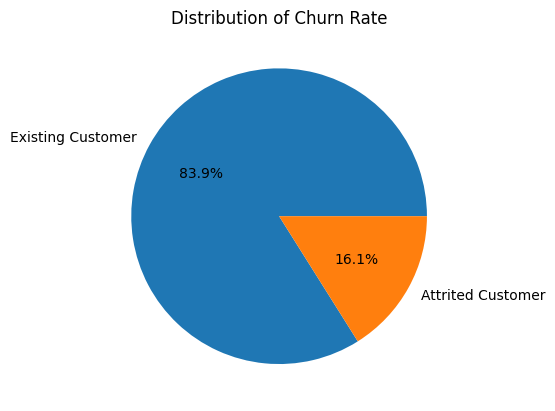

In [105]:
# Count the number of unique values in the attrition_flag column
attrition_counts = df_clean['attrition_flag'].value_counts()

# Calculate the percentage of each unique value
attrition_percentage = 100 * attrition_counts / sum(attrition_counts)

# Plot the results as a pie chart
plt.pie(attrition_percentage, labels=attrition_counts.index, autopct='%.1f%%')

# Add a title to the chart
plt.title("Distribution of Churn Rate")

# Show the chart
plt.show()

### Observation: 
Churn Rate is 16.1%

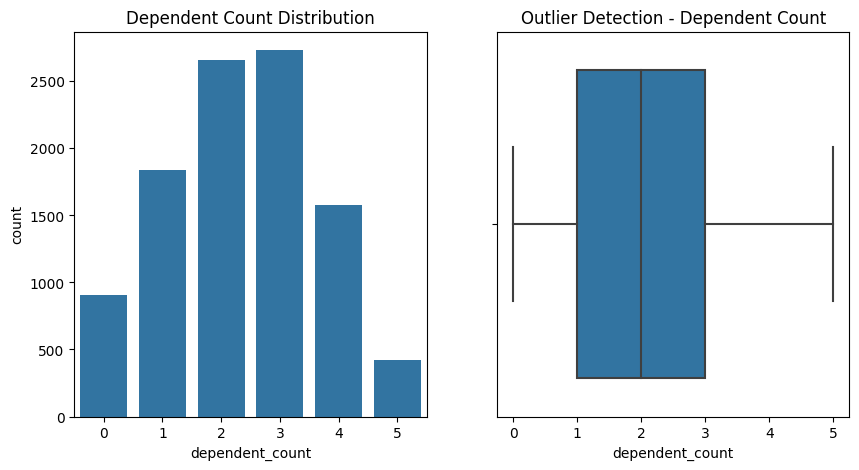

In [106]:
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[0]
# Count Plot
plt.subplot(1,2,1)
sns.countplot(x='dependent_count', data=df_clean, color = base_color)
plt.title('Dependent Count Distribution')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='dependent_count', data=df_clean, color=base_color)
plt.title('Outlier Detection - Dependent Count')
plt.show()

### Observation:
1. Most customers has 3 to 2 dependent.
2. From the box plot we don't see any outlier.

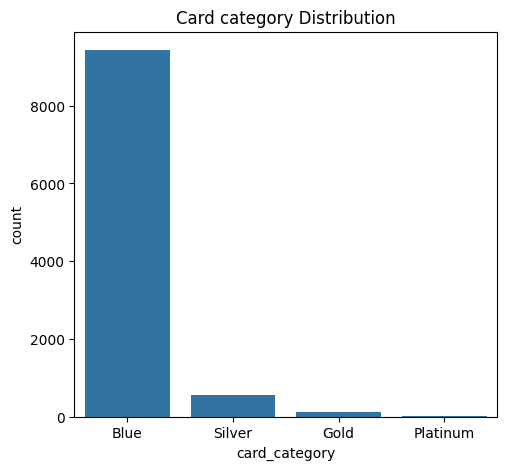

In [107]:
plt.figure(figsize=(12,5))
# Count Plot
plt.subplot(1,2,1)
sns.countplot(x='card_category', data=df_clean, color = base_color)
plt.title('Card category Distribution');

### Observations:
Majority of the customer is blue card holder.

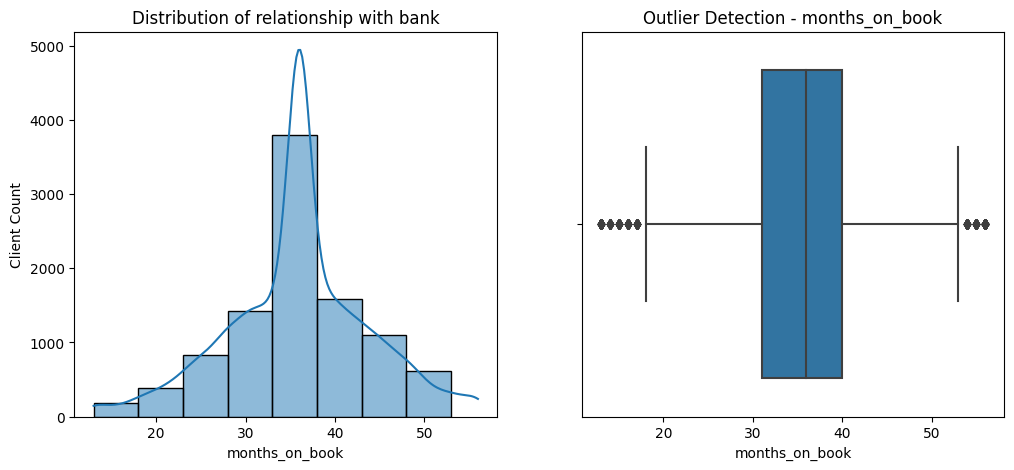

In [108]:
plt.figure(figsize=(12,5))
bins = np.arange(df_clean['months_on_book'].min(), df_clean['months_on_book'].max()+0.5, 5)
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='months_on_book', data=df_clean, color = base_color, bins = bins, kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of relationship with bank')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='months_on_book', data=df_clean, color=base_color)
plt.title('Outlier Detection - months_on_book')
plt.show()

### Observation:
1. On average a customer is staying with bank from 35-36 months.
2. we do see some outliers before 15 and after 55.

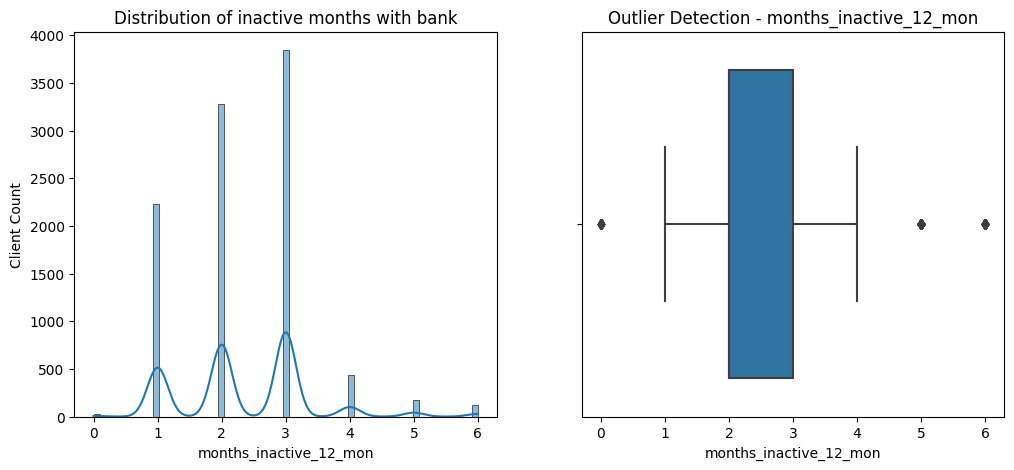

In [109]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='months_inactive_12_mon', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of inactive months with bank')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='months_inactive_12_mon', data=df_clean, color=base_color)
plt.title('Outlier Detection - months_inactive_12_mon')
plt.show()

### Observation:
1. Most customers we inactive for 1-3 months and there is some outliers where some customers were inactive for 5-6 months.

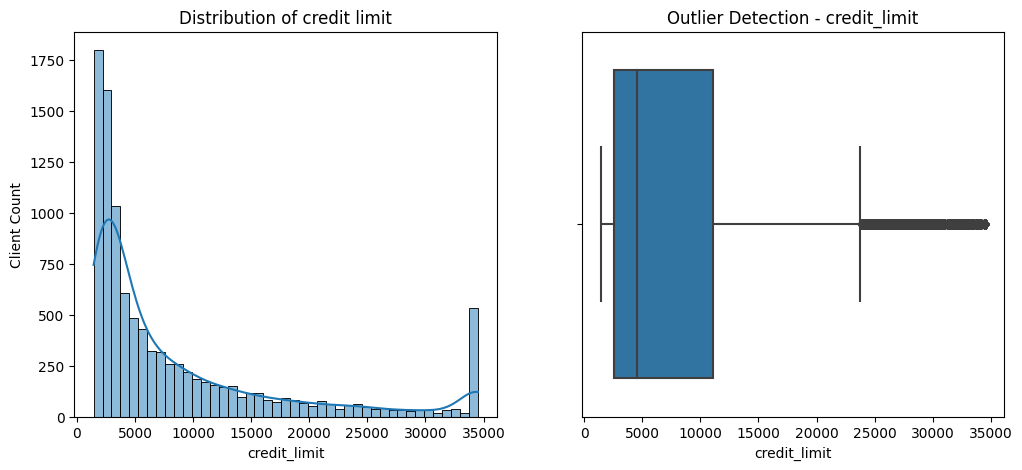

In [110]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='credit_limit', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of credit limit')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='credit_limit', data=df_clean, color=base_color)
plt.title('Outlier Detection - credit_limit')
plt.show()

### Observation:
1. The histplot is right skewed.
2. Most credit limit are from 1500-5500.
3. There is some outliers at the higher credit limit from around 24000.

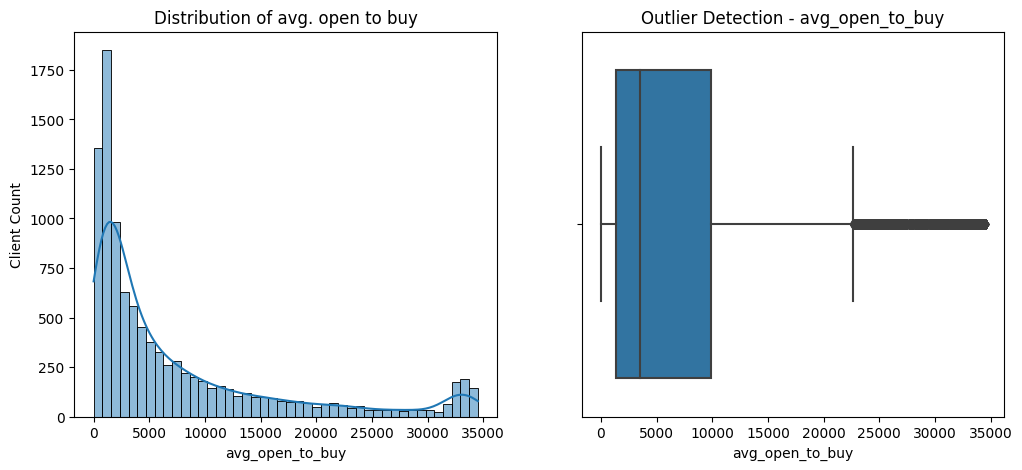

In [111]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='avg_open_to_buy', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of avg. open to buy')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='avg_open_to_buy', data=df_clean, color=base_color)
plt.title('Outlier Detection - avg_open_to_buy')
plt.show()

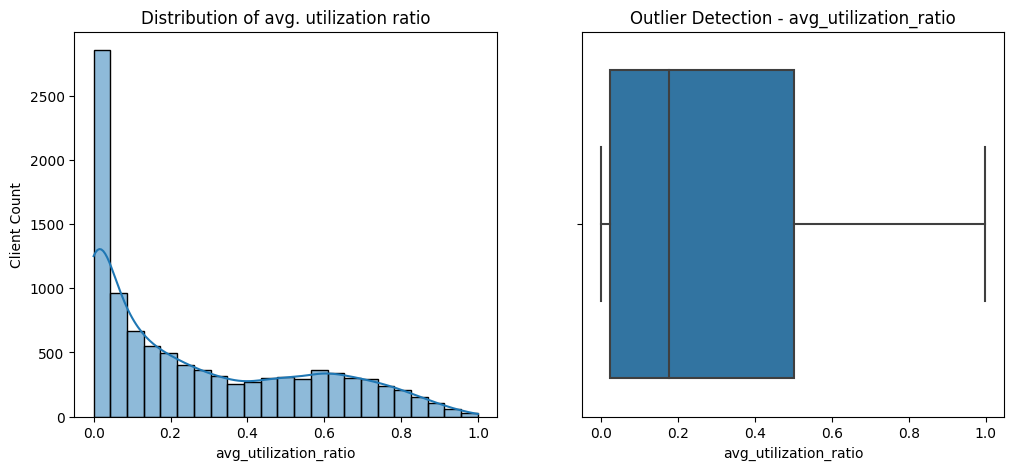

In [112]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='avg_utilization_ratio', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of avg. utilization ratio')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='avg_utilization_ratio', data=df_clean, color=base_color)
plt.title('Outlier Detection - avg_utilization_ratio')
plt.show()

### Observation:
1. Hisplot is right skewed.
2. Most customer's avg. utilization ratio is 0-0.1.
3. No outlier is detected.

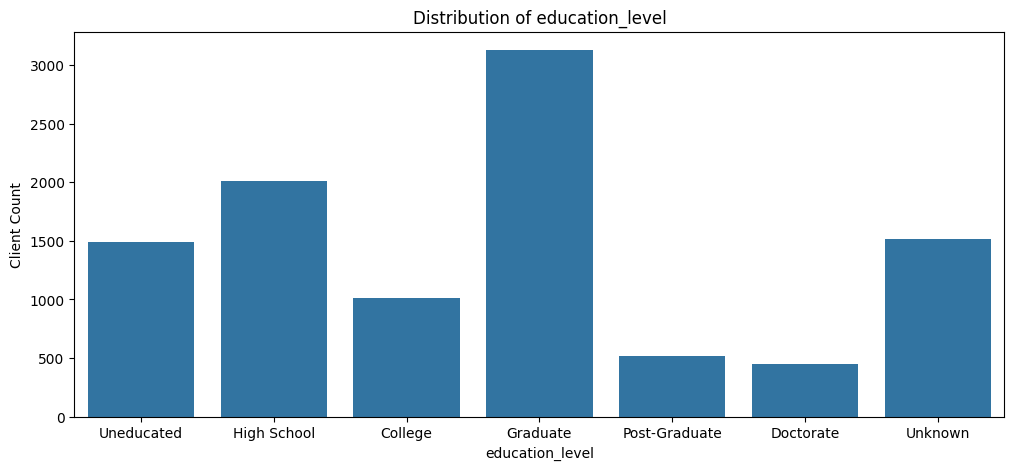

In [122]:
plt.figure(figsize=(12,5))
sns.countplot(x='education_level', data=df_clean, color = base_color)
plt.ylabel('Client Count')
plt.title('Distribution of education_level');

### Observation:
Most customers have graduate and high school level of education.

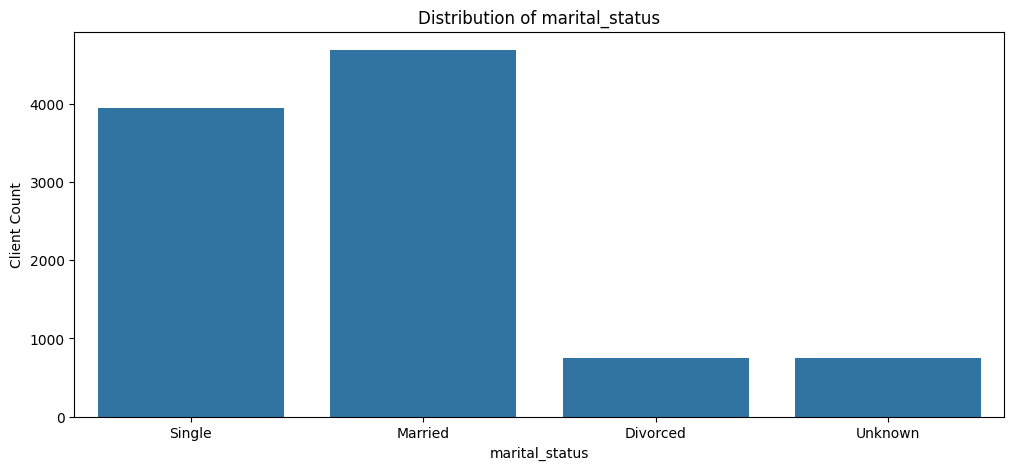

In [123]:
plt.figure(figsize=(12,5))
sns.countplot(x='marital_status', data=df_clean, color = base_color)
plt.ylabel('Client Count')
plt.title('Distribution of marital_status');

### Observation:
Most customers are either married or single. 

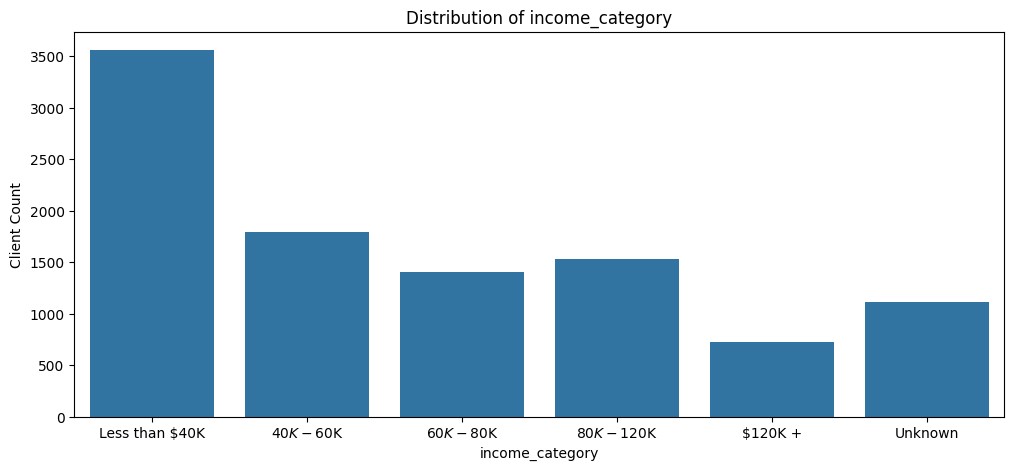

In [121]:
plt.figure(figsize=(12,5))
sns.countplot(x='income_category', data=df_clean, color = base_color)
plt.ylabel('Client Count')
plt.title('Distribution of income_category');

### Ovservation:
Most of the customer's income level is less than $40k.

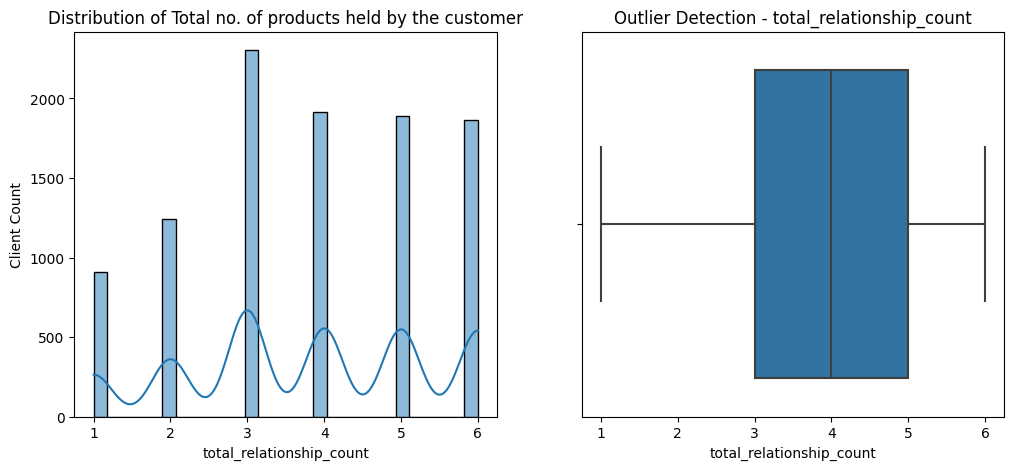

In [124]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_relationship_count', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Total no. of products held by the customer')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_relationship_count', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_relationship_count')
plt.show()

### Observation:
Most of customer held 3-6 products from the bank and no outlier is detected.

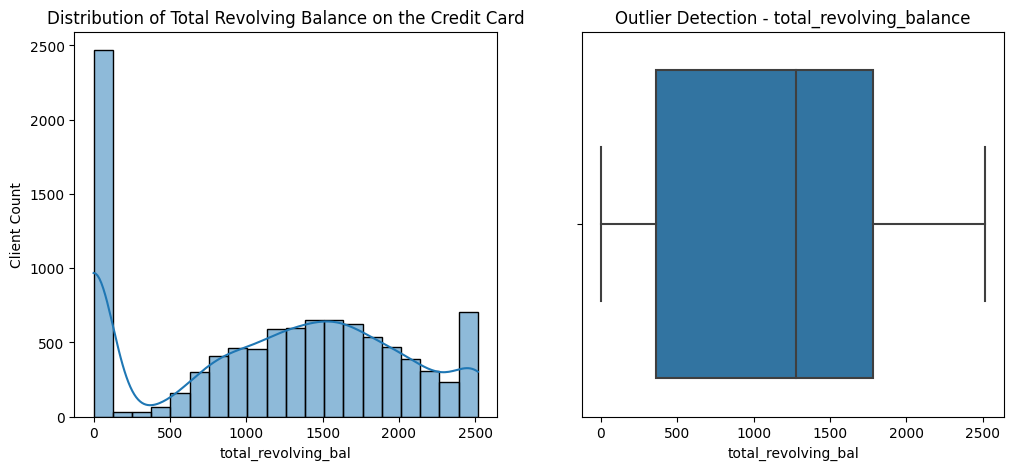

In [126]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_revolving_bal', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Total Revolving Balance on the Credit Card')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_revolving_bal', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_revolving_balance')
plt.show()

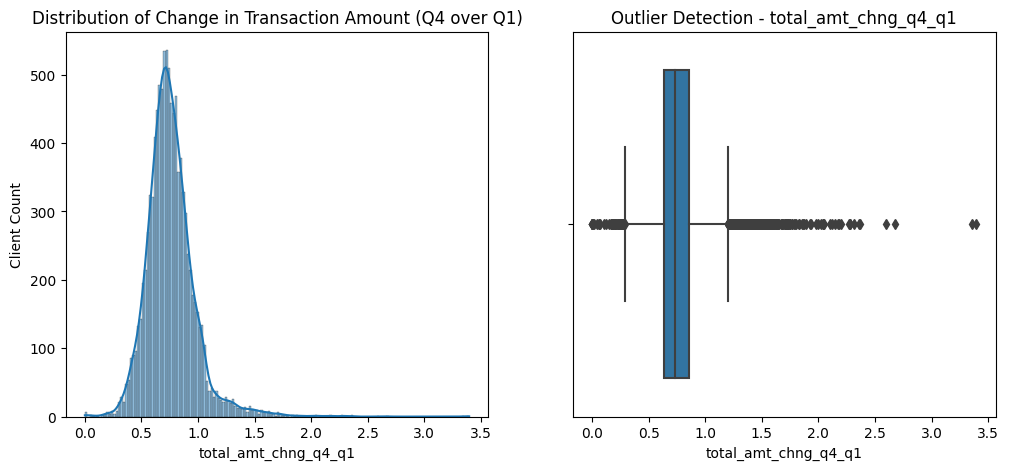

In [127]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_amt_chng_q4_q1', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Change in Transaction Amount (Q4 over Q1)')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_amt_chng_q4_q1', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_amt_chng_q4_q1')
plt.show()

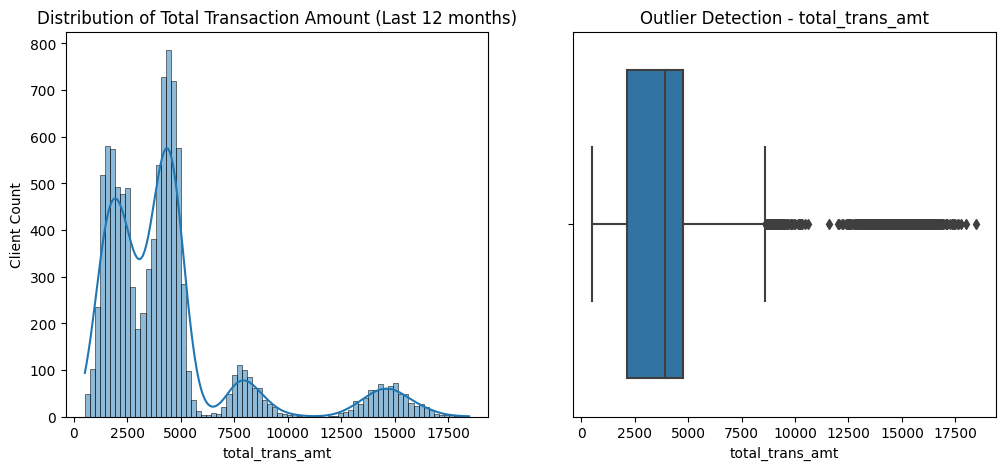

In [128]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_trans_amt', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Total Transaction Amount (Last 12 months)')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_trans_amt', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_trans_amt')
plt.show()

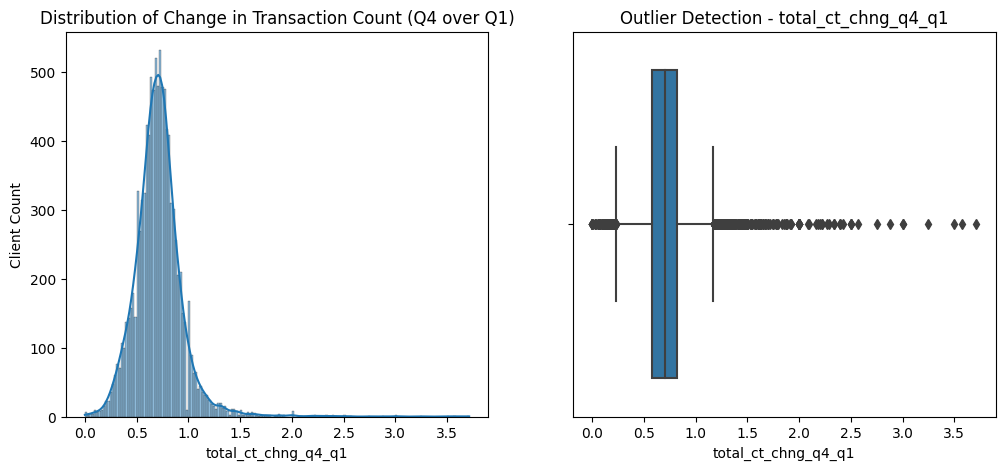

In [129]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_ct_chng_q4_q1', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Change in Transaction Count (Q4 over Q1)')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_ct_chng_q4_q1', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_ct_chng_q4_q1')
plt.show()

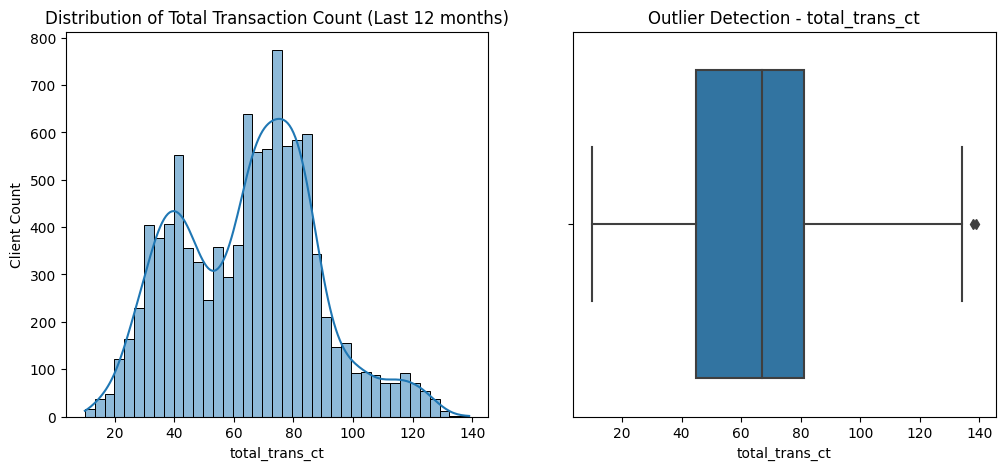

In [130]:
plt.figure(figsize=(12,5))
# Hist Plot
plt.subplot(1,2,1)
sns.histplot(x='total_trans_ct', data=df_clean, color = base_color,  kde= True)
plt.ylabel('Client Count')
plt.title('Distribution of Total Transaction Count (Last 12 months)')

# Box Plot
plt.subplot(1,2,2)
sns.boxplot(x='total_trans_ct', data=df_clean, color=base_color)
plt.title('Outlier Detection - total_trans_ct')
plt.show()

# Cross-Correlation Analysis

In [135]:
df_clean['churn']=df_clean['attrition_flag'].replace({'Existing Customer':0,'Attrited Customer':1})

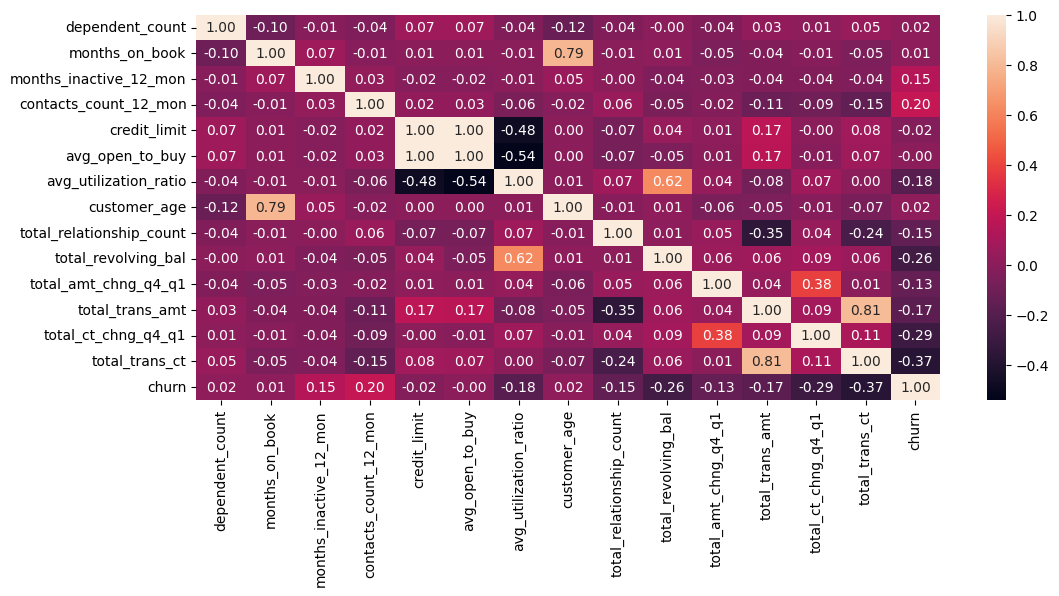

In [136]:
plt.figure(figsize=(12,5))
sns.heatmap(df_clean.corr(), fmt = '.2f', annot=True)
plt.show();

### Observation:
1. we can see positive correlation between customer_age and months_on_book, total_revolving_bal and avg_utilization_ratio, total_trans_amt and total_trans_ct.
2. Negative correlation between avg_utilization_ratio and credit_limit, avg_utilization_ratio and avg_open_to_buy, total_trans_amt and total_relationship_count.
3. churn has negative correlation with avg_utilization_ratio, total_relationship_count, total_revolving_bal, total_amt_chng_q4-q1,, total_trans_amt, total_ct_chng_q4_q1, and total_trans_ct. 

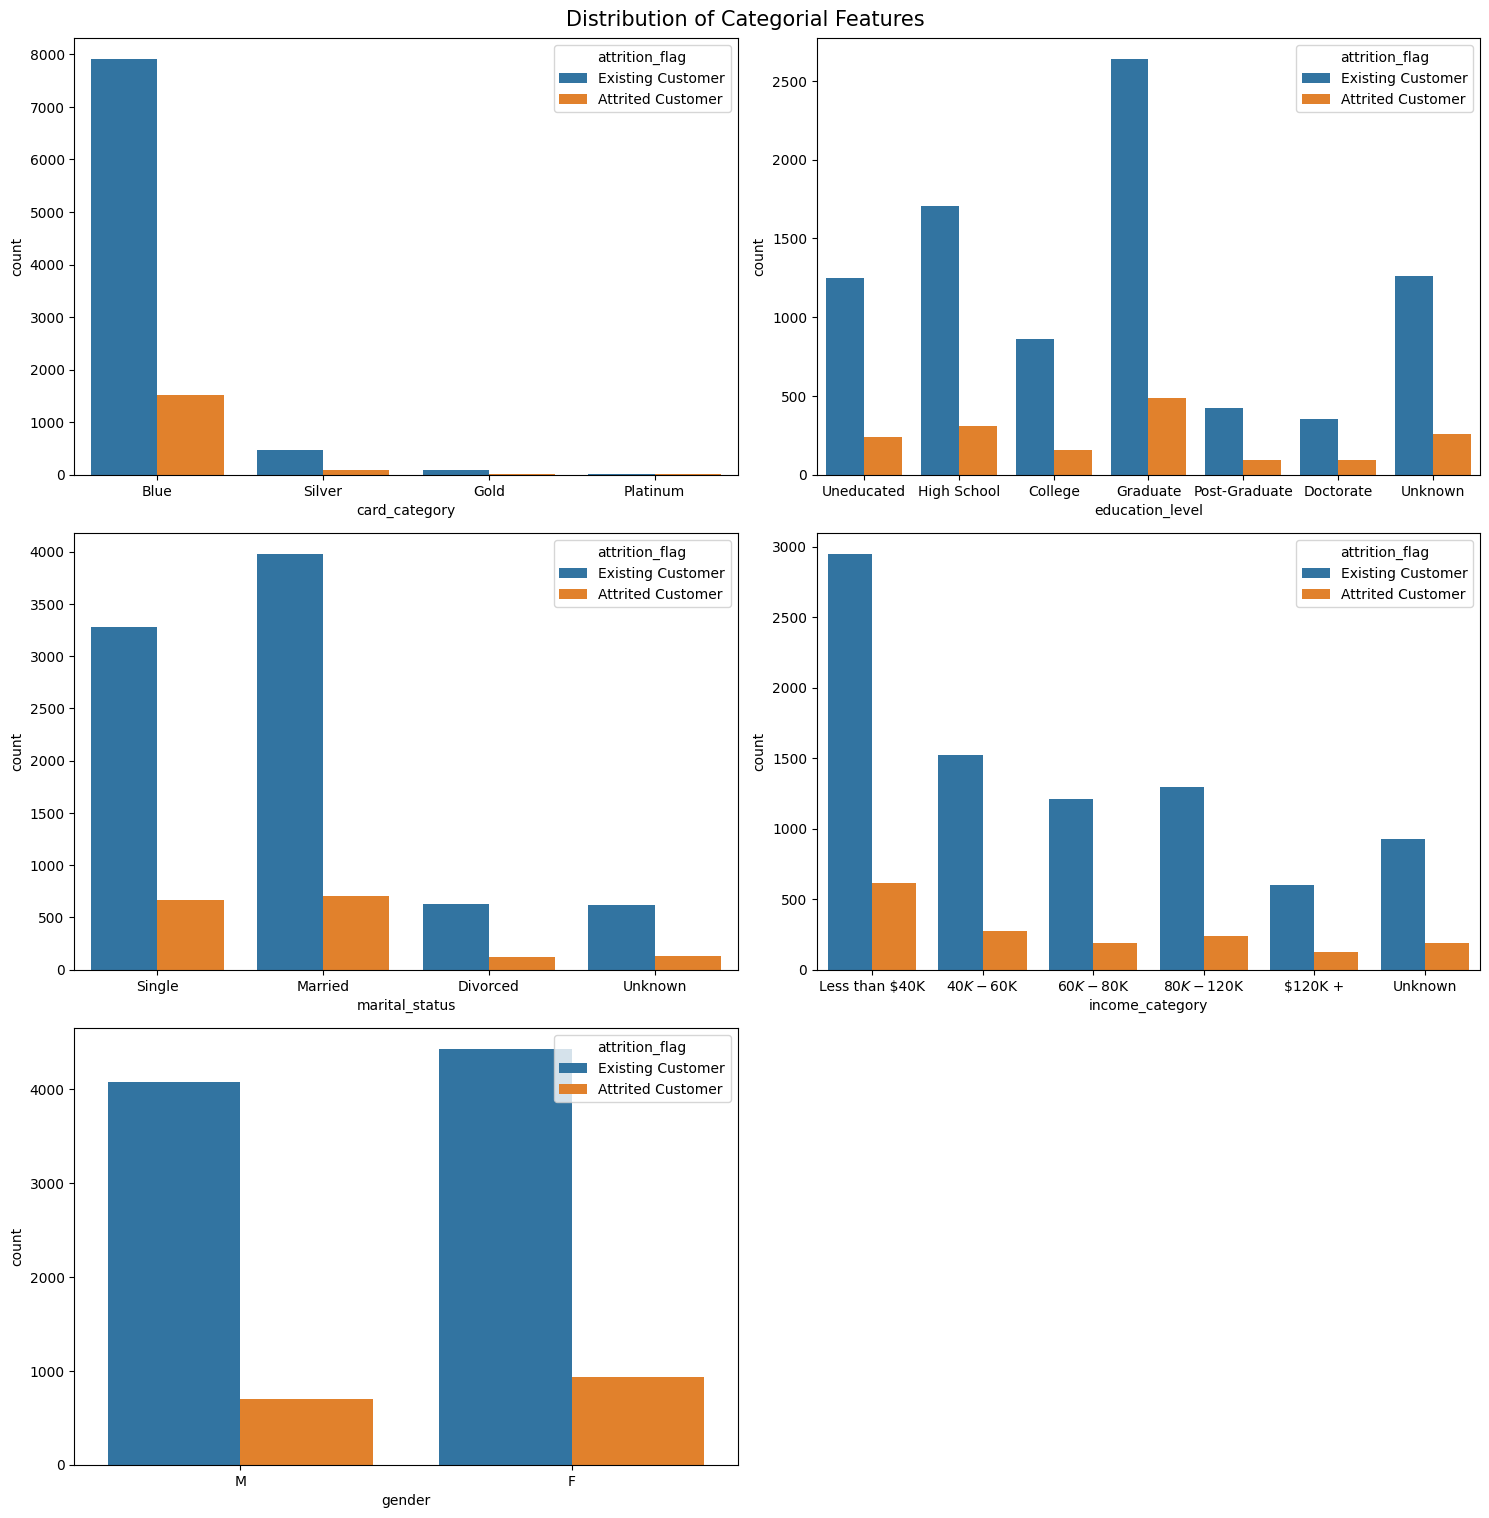

In [142]:
def plot_categorical_distribution(df, cols):
    n_cols = len(cols)
    n_rows = int(np.ceil(n_cols / 2))
    plt.figure(figsize=(15, 15))
    
    for i, col in enumerate(cols):
        plt.subplot(n_rows, 2, i+1)
        sns.countplot(x=df[col], hue=df.attrition_flag)
        
    plt.tight_layout()
    plt.suptitle(f'Distribution of Categorial Features\n', va='bottom', fontsize=15)
    plt.show()

plot_categorical_distribution(df_clean, ['card_category','education_level','marital_status','income_category','gender'])

## Raising Data Questions

1. Question: how total transaction count is different between churned and existing customer?
2. Question: how total transaction amount is ditributed between churned and existing customer?
3. Question: how total revolving balance is distributed between churned and existing customer?
4. Question: how churned customer is utilizing their card?

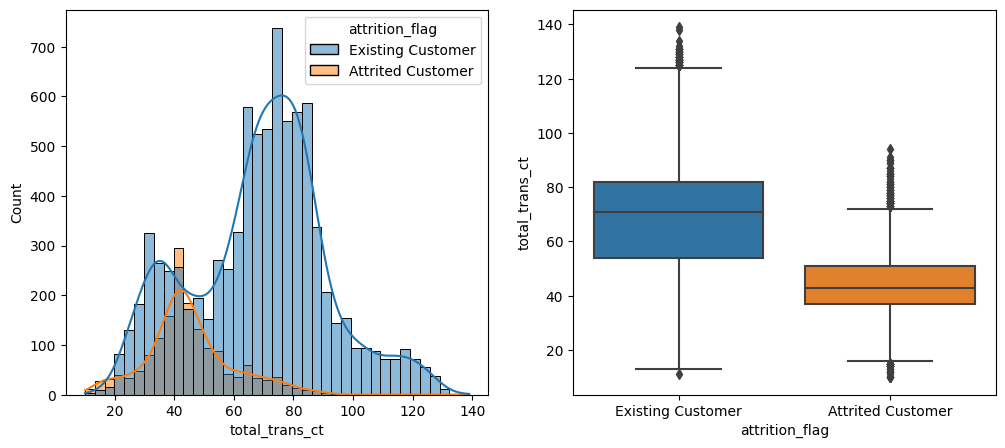

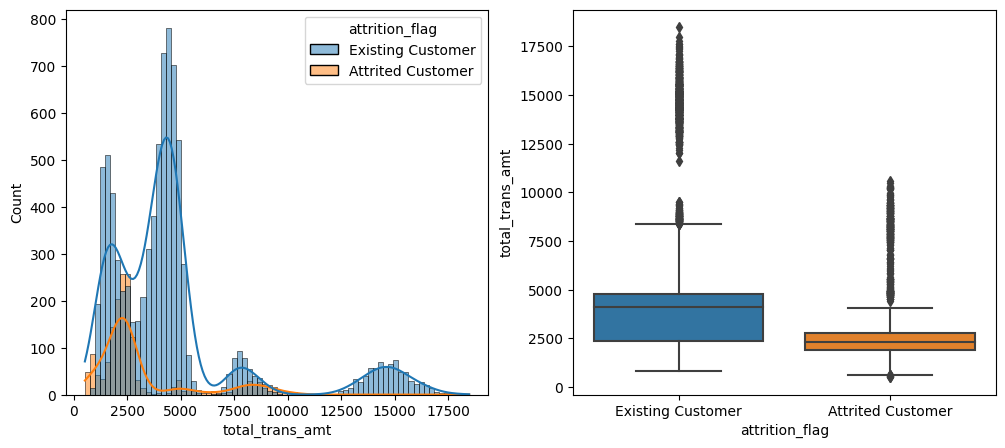

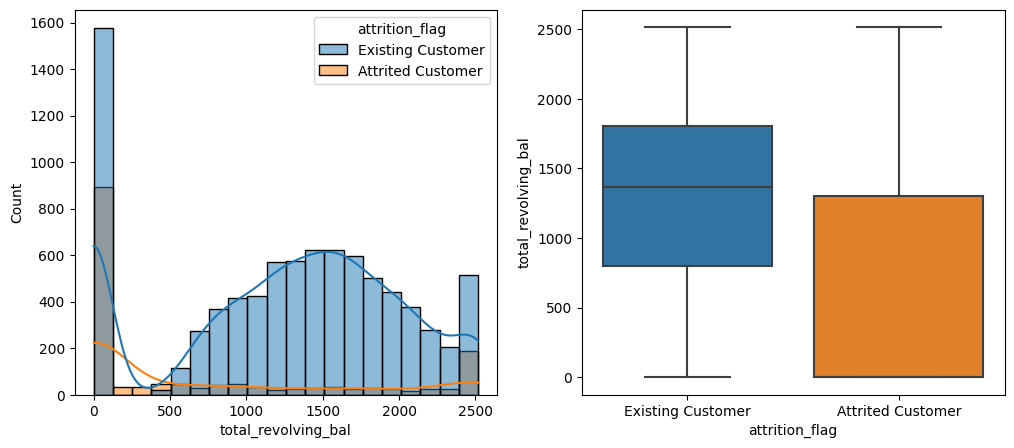

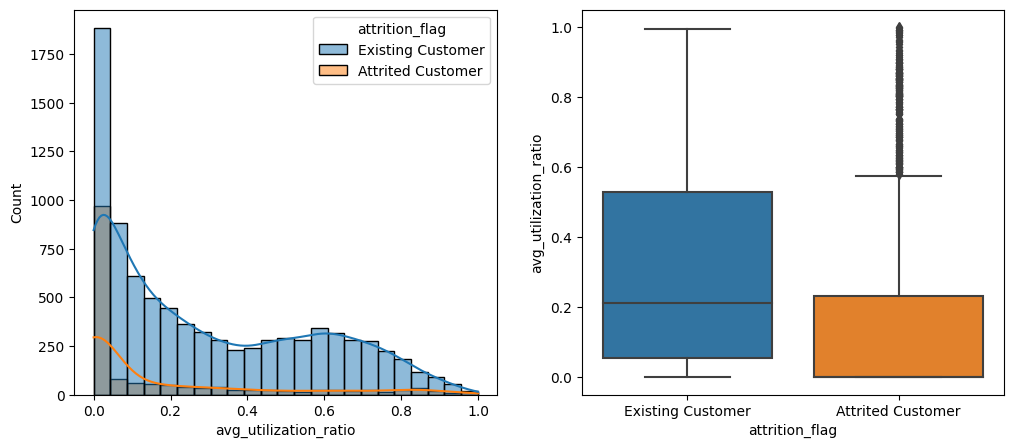

In [149]:
def plot_cols(df, cols):
    for col in cols:
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(data=df, x=col, hue='attrition_flag', ax=ax[0], kde=True)
        sns.boxplot(data=df, x='attrition_flag', y=col, ax=ax[1])
        plt.show()
columns = ['total_trans_ct','total_trans_amt','total_revolving_bal','avg_utilization_ratio']
plot_cols(df_clean, columns)

### Observation:
Churned customer tends to have low transaction count (less than 50), low transaction amount (less than 2500), low total revolving balance (around 1000), and utilization ration around .2. Which gives us some understanding that churned customer tend to use their card less before churning. 

## Data Enrichment
1. I would collect credit history data of each customer such as payment history, credit score, outstanding debts, mortgage. This would help us understand their payment behavior, how often they take out loan, and how frequently they pay out their debt. 
2. Collecting customer sentiment data to understand how customers feel about the product that they are using. This could be done by customer survey or online review. Also, we don't have any data if the bank is offering new product or services such as credit transfer, 0% interest rate card offer for a limited time, new loan offer, low APR car loan offer etc. If we can collect these and based on that we can then try to analyze if customer behavior change or not regrading current utilization_ratio, or transaction count etc. 
 